In [0]:
import dlib
import cv2
import os
import re
import json
from pylab import *
from PIL import Image, ImageChops, ImageEnhance

In [8]:

train_frame_folder = 'drive/My Drive/train_sample_video'
#with open(os.path.join(train_frame_folder, 'metadata.json'), 'r') as file:
with open(os.path.join(train_frame_folder ,'metadata.json'), 'r') as file:
    data = json.load(file)
    print(data)
list_of_train_data = [f for f in os.listdir(train_frame_folder) if f.endswith('.mp4')]
detector = dlib.get_frontal_face_detector()
for vid in list_of_train_data:
    count = 0
    cap = cv2.VideoCapture(os.path.join(train_frame_folder, vid))
    frameRate = cap.get(5)
    while cap.isOpened():
        frameId = cap.get(1)
        ret, frame = cap.read()
        if ret != True:
            break
        if frameId % ((int(frameRate)+1)*1) == 0:
            face_rects, scores, idx = detector.run(frame, 0)
            for i, d in enumerate(face_rects):
                x1 = d.left()
                y1 = d.top()
                x2 = d.right()
                y2 = d.bottom()
                crop_img = frame[y1:y2, x1:x2]
                if data[vid]['label'] == 'REAL':
                    path = 'drive/My Drive/dataset/real'
                    cv2.imwrite(os.path.join(path, vid.split('.')[0]+'_'+str(count)+'.png'), cv2.resize(crop_img, (128, 128)))
                    #cv2.imwrite('dataset/real/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                elif data[vid]['label'] == 'FAKE':
                    path = 'drive/My Drive/dataset/fake'
                    cv2.imwrite(os.path.join(path, vid.split('.')[0]+'_'+str(count)+'.png'), cv2.resize(crop_img, (128, 128)))
                    cv2.imwrite('dataset/fake/'+vid.split('.')[0]+'_'+str(count)+'.png', cv2.resize(crop_img, (128, 128)))
                count+=1

{'aagfhgtpmv.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'vudstovrck.mp4'}, 'aapnvogymq.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'jdubbvfswz.mp4'}, 'abarnvbtwb.mp4': {'label': 'REAL', 'split': 'train', 'original': None}, 'abofeumbvv.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'atvmxvwyns.mp4'}, 'abqwwspghj.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'qzimuostzz.mp4'}, 'acifjvzvpm.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'kbvibjhfzo.mp4'}, 'acqfdwsrhi.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'ccfoszqabv.mp4'}, 'acxnxvbsxk.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'fjlyaizcwc.mp4'}, 'acxwigylke.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'ffcwhpnpuw.mp4'}, 'aczrgyricp.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'slwkmefgde.mp4'}, 'adhsbajydo.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'fysyrqfguw.mp4'}, 'adohikbdaz.mp4': {'label': 'FAKE', 'split': 'train', 'original': 'qjlhemtkx

In [0]:
print(dataset)

NameError: ignored

In [0]:
list drive

SyntaxError: ignored

In [0]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
input_shape = (128, 128, 3)
data_dir = 'drive/My Drive/dataset'

real_data = [f for f in os.listdir(data_dir+'/real') if f.endswith('.png')]
fake_data = [f for f in os.listdir(data_dir+'/fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/real/'+img)).flatten() / 255.0)
    Y.append(1)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/fake/'+img)).flatten() / 255.0)
    Y.append(0)

Y_val_org = Y

#Normalization
X = np.array(X)
Y = to_categorical(Y, 2)

#Reshape
X = X.reshape(-1, 128, 128, 3)

#Train-Test split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [13]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
219062272/219055592 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 2, 2, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3074      
Total params: 54,339,810
Trainable params: 54,279,266
Non-trainable params: 60,544
_________________________________________________________________


In [16]:
#Currently not used
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               verbose=0, mode='auto')
EPOCHS = 4
BATCH_SIZE = 100
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (X_val, Y_val), verbose = 1)

Train on 76 samples, validate on 19 samples
Epoch 1/4
76/76 [==============================] - 29s 382ms/sample - loss: 0.4982 - acc: 0.9079 - val_loss: 0.6218 - val_acc: 0.6842
Epoch 2/4
76/76 [==============================] - 29s 381ms/sample - loss: 0.4092 - acc: 0.9868 - val_loss: 0.6156 - val_acc: 0.6842
Epoch 3/4
76/76 [==============================] - 29s 381ms/sample - loss: 0.3471 - acc: 1.0000 - val_loss: 0.6091 - val_acc: 0.6842
Epoch 4/4
76/76 [==============================] - 29s 381ms/sample - loss: 0.3006 - acc: 1.0000 - val_loss: 0.6026 - val_acc: 0.6842


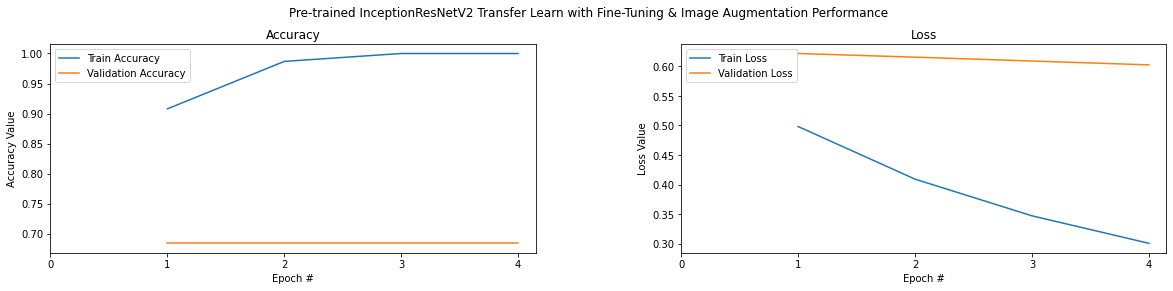

In [18]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained InceptionResNetV2 Transfer Learn with Fine-Tuning & Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

True positive =  64
False positive =  21
False negative =  0
True negative =  10




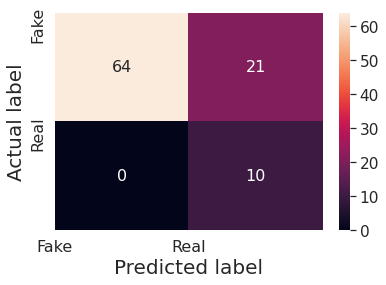

In [19]:

#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    
print_confusion_matrix(Y_val_org, model.predict_classes(X))

In [0]:
model.save('deepfake-detection-model.h5')

In [0]:

import tensorflow as tf
import dlib
import cv2
import os
import numpy as np
from PIL import Image, ImageChops, ImageEnhance
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [22]:
model = load_model('deepfake-detection-model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:

input_shape = (128, 128, 3)
pr_data = []
detector = dlib.get_frontal_face_detector()
cap = cv2.VideoCapture('drive/My Drive/altziddtxi.mp4')
frameRate = cap.get(5)
while cap.isOpened():
    frameId = cap.get(1)
    ret, frame = cap.read()
    if ret != True:
        break
    if frameId % ((int(frameRate)+1)*1) == 0:
        face_rects, scores, idx = detector.run(frame, 0)
        for i, d in enumerate(face_rects):
            x1 = d.left()
            y1 = d.top()
            x2 = d.right()
            y2 = d.bottom()
            crop_img = frame[y1:y2, x1:x2]
            data = np.array(img_to_array(cv2.resize(crop_img, (128, 128))))
            data = data.reshape(-1, 128, 128, 3)
            print(model.predict_classes(data))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
